# Data description :

# Importing libraries :

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

# EDA:

In [5]:
df.isnull().sum()
#check if there is missing data and we found that there is no missing data 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.info()
#we have three types in this data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

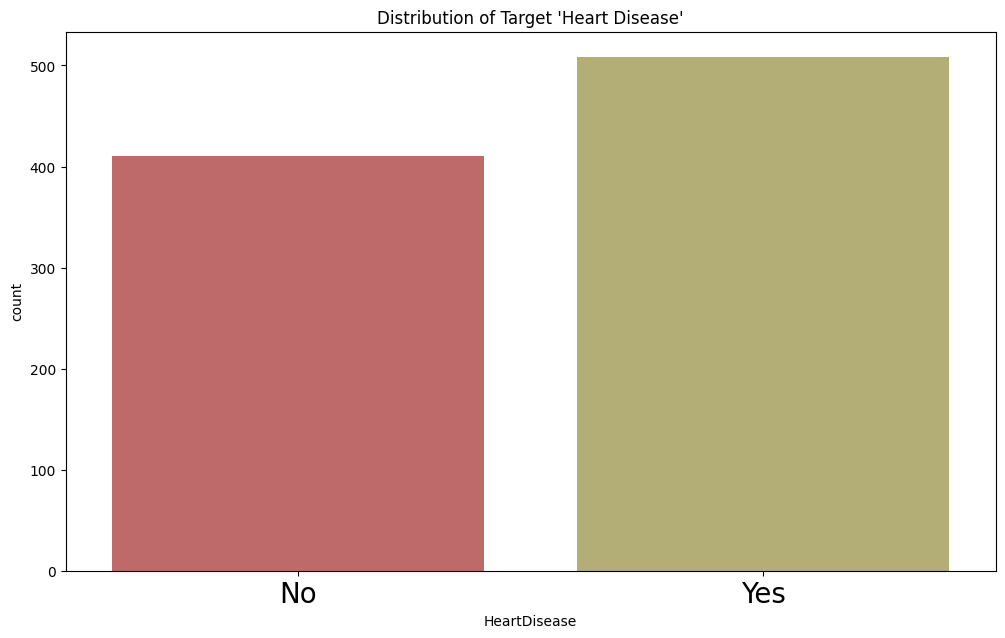

In [7]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=df.HeartDisease,palette=["#CD5C5C","#BDB76B"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)
#OUR TARGET IS Heart Disease :

Here we notice that there is heartdisease is more than there is not 

Text(0, 0.5, 'Count')

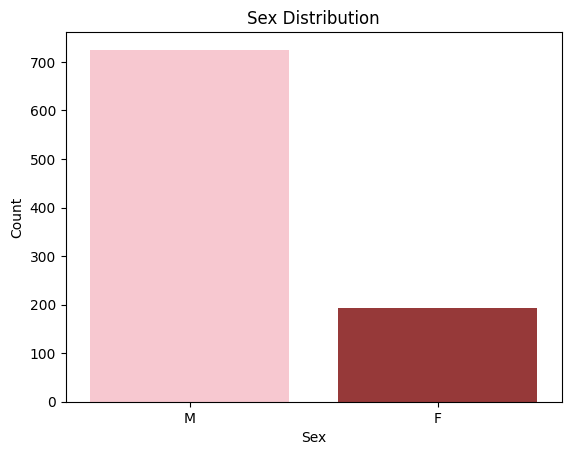

In [8]:
sns.countplot(data=df,x='Sex' , palette=['pink','brown']);
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

Here we notice the who have more heart disease is the males 

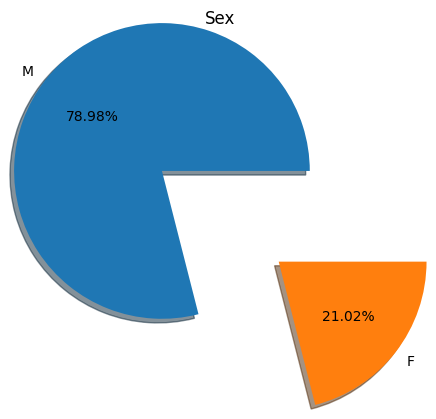

In [9]:
plt.rcParams.update({'font.size': 10})
ax=df['Sex'].value_counts().plot.pie(explode=[0.5,0.5],autopct='%1.2f%%',shadow=True );
ax.set_title(label = "Sex");
plt.axis('off');

Here we find 78.98% of makes have heart disease and 21.02% of females have heart disease and 
males are approximately 3 times more likely to have heart disease than females.

In [11]:
df.ChestPainType.unique() 

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Here we check the types of chestpain :we have four types of chest pain 
    ATA,NAP,ASY,TA
   

In [12]:
ChestPainType_label = ['ATA', 'NAP', 'ASY', 'TA']
ChestPainType_size = [173, 203, 496, 46]
ChestPainType_explode = (0, 0, 0, 0)

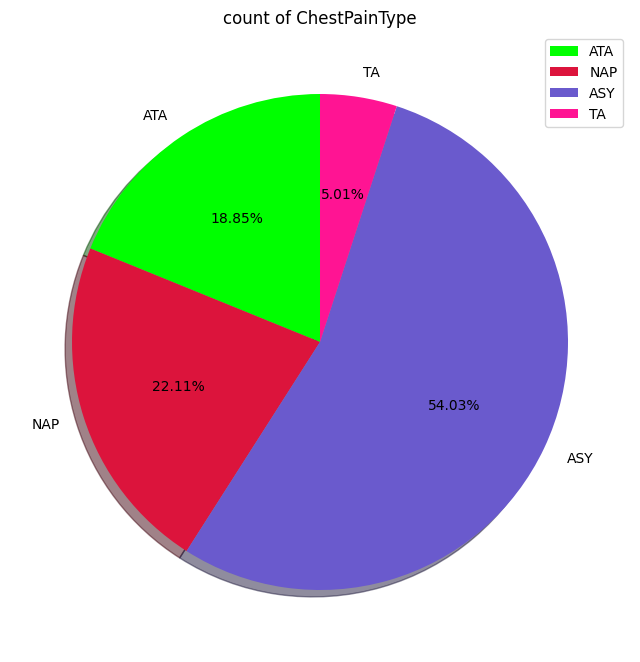

In [13]:
plt.figure(figsize=(8,9))
plt.pie( ChestPainType_size , explode=ChestPainType_explode , labels=ChestPainType_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors= ['lime','crimson', 'slateblue', 'deeppink'])
plt.title("count of ChestPainType")
plt.legend()

 Here we found that ASY is the type who has the highest pre for the pain chest .

Here first we have to know that  RestingECG is :a non-invasive test that can detect abnormalities including arrhythmias,evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks. 

In [14]:
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)

here we have three levels of restingEGG':'Normal', 'ST', 'LVH'

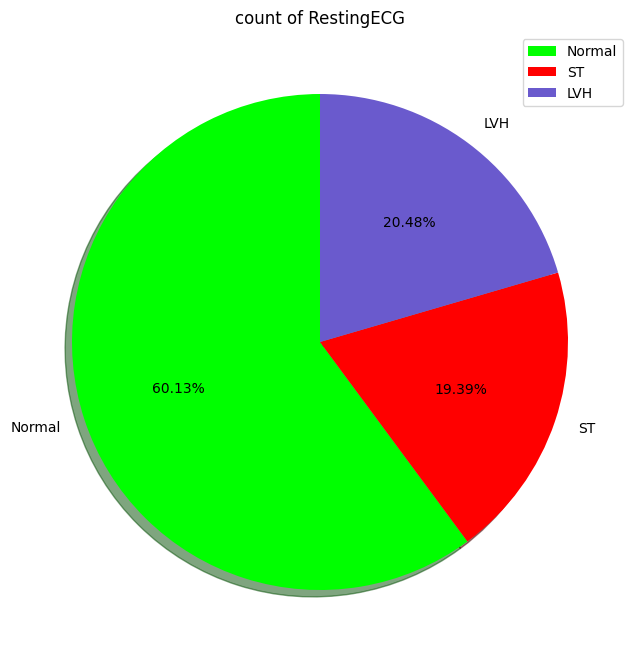

In [15]:
plt.figure(figsize=(8,9))
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['lime', 'red', 'slateblue'])
plt.title("count of RestingECG")
plt.legend()

Here we find that the normal have the highest pre 

In [16]:
ExerciseAngina_label = ['yes', 'no']
ExerciseAngina_size = [552, 178]
ExerciseAngina_explode = (0, 0)

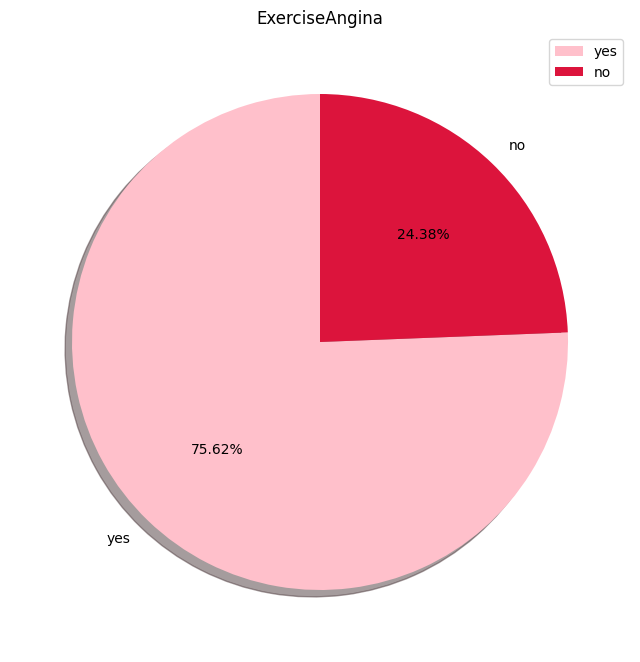

In [17]:
plt.figure(figsize=(8,9))
plt.pie( ExerciseAngina_size , explode=ExerciseAngina_explode , labels=ExerciseAngina_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['pink', 'crimson'])
plt.title("ExerciseAngina")
plt.legend()

Here who had ExerciseAngina is more than whos hadnot and by pre is 75.62%

In [ ]:
ST_Slope_label = ['Flat','Up','Down']
ST_Slope_size = [552, 178, 188]
ST_Slope_explode = (0, 0, 0)

In [ ]:
plt.figure(figsize=(8,9))
plt.pie( ST_Slope_size , explode=ST_Slope_explode , labels=ST_Slope_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['brown', 'crimson','yellow'])
plt.title("ST_Slopea")
plt.legend()

In [19]:
Categorical = df.select_dtypes(include=['object'])
Numerical = df.select_dtypes(include=['int64', 'float64'])

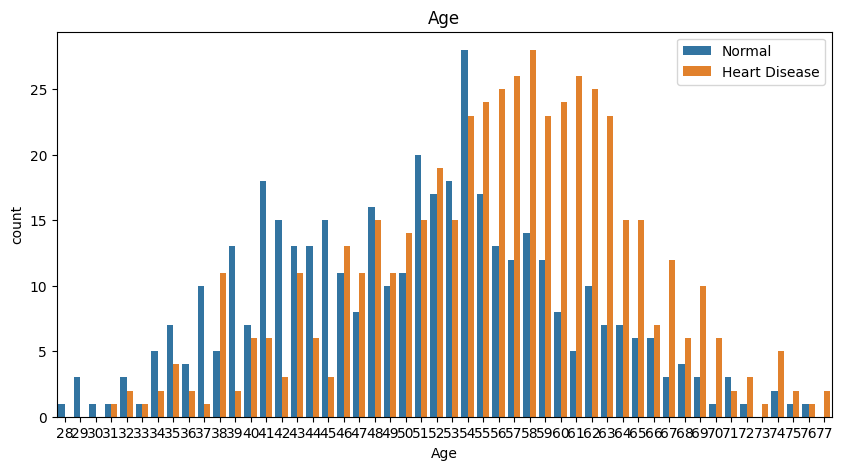

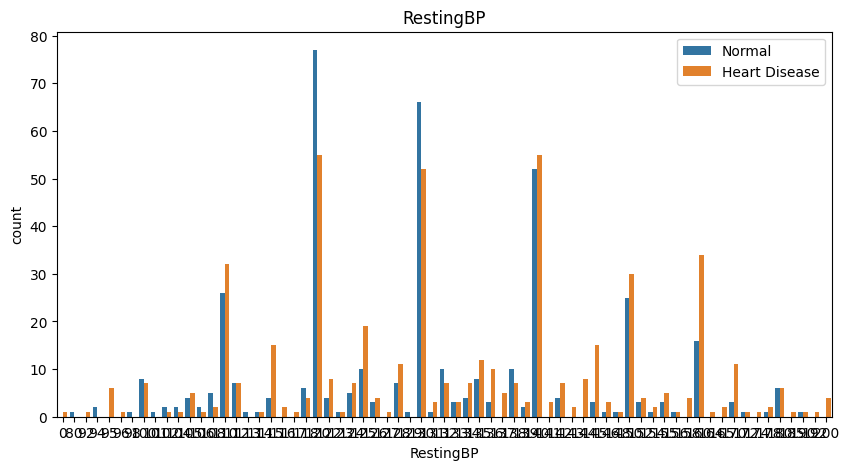

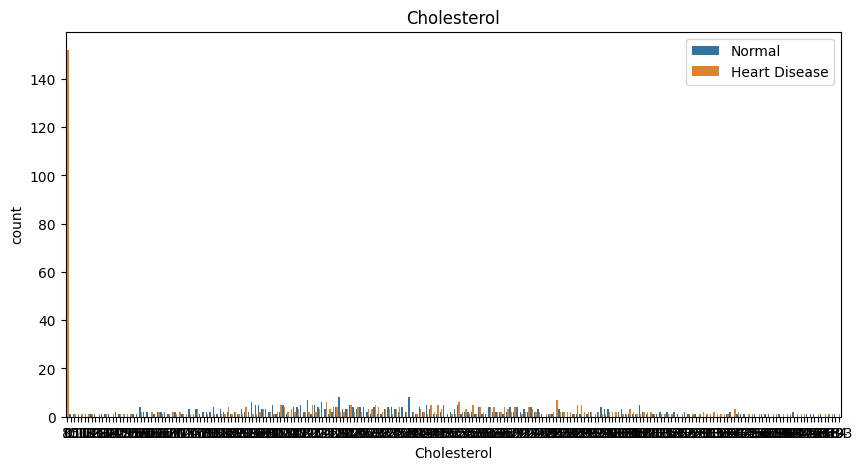

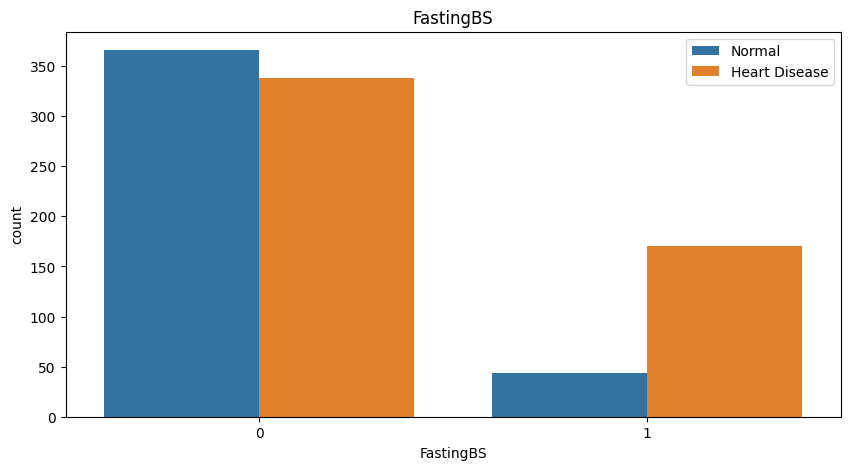

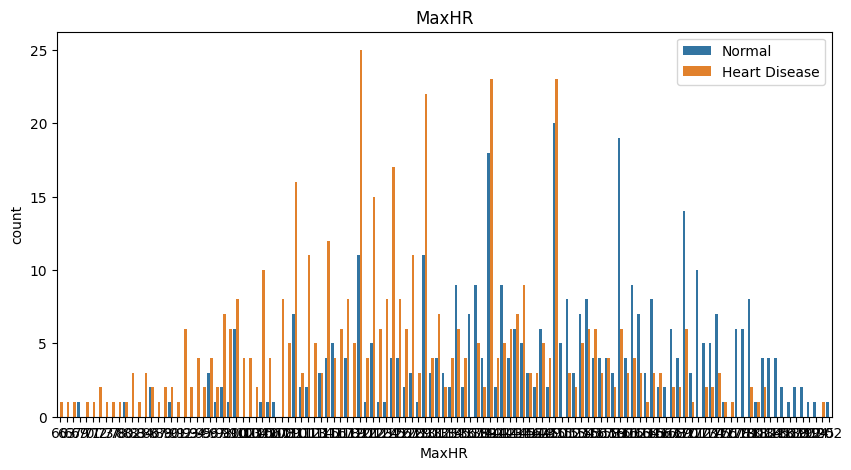

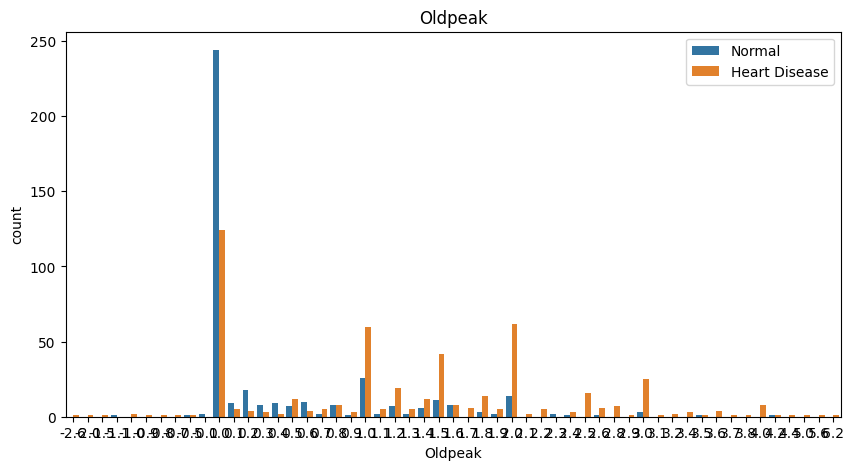

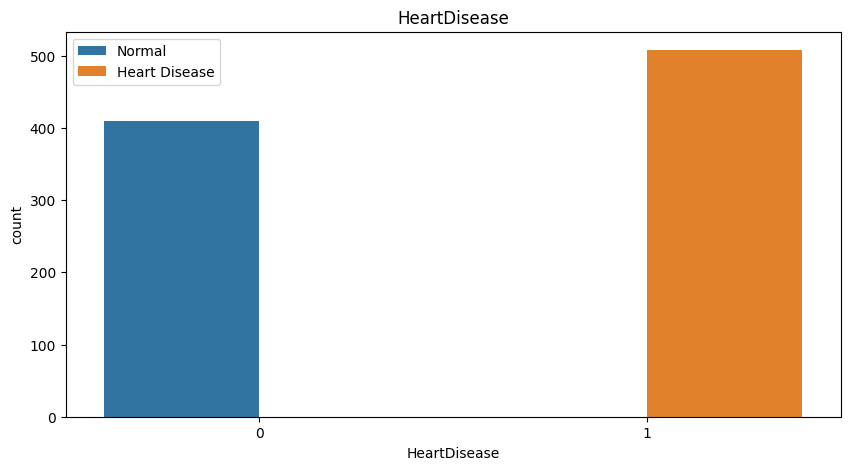

In [20]:
# ploting numerical features with target
#here we compare betwwen our target and our numerical features 
for i in Numerical:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i, data=df, hue='HeartDisease')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

In [ ]:
#here we compare betwwen our target and our Categorical features 
for i in Categorical:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=df, hue='HeartDisease', edgecolor='black')
    plt.legend(['Normal', 'Heart Disease'])
    plt.title(i)
    plt.show()

# Handeling with outliers :

<Axes: >

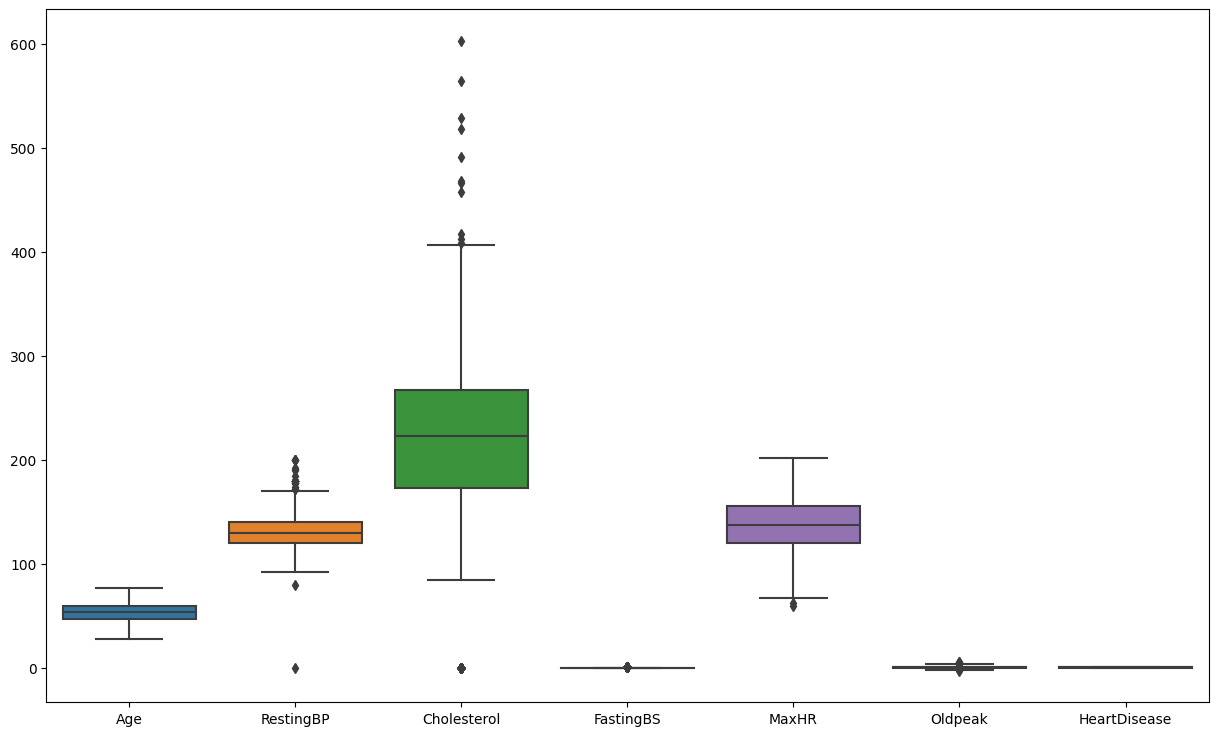

In [21]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df)

after the boxplot we find that the outliers here in (age - restingBP-cholesterol-MaxHR-oldpeak)

so that i decided to make alist of them 

In [22]:
df_num_name = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [23]:
#here we are detecting outliers :

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [24]:
#here we are trying to find the numbers of outliers and max and min of them to can detect them clearly:
outliers = find_outliers_IQR(df['RestingBP'])
print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 28
max outlier value: 200
min outlier value: 0


we find that there are 27 outliers and max ouliers id 200 and the min is 80 

In [25]:
for char in df_num_name :
    outliers = find_outliers_IQR(df[str(char)])
    
    print(f"-Check {char} outliers ")

    print('number of outliers: '+ str(len(outliers)))

    print('max outlier value: '+ str(outliers.max()))

    print('min outlier value: '+ str(outliers.min())+ '\n')

-Check Age outliers 
number of outliers: 0
max outlier value: nan
min outlier value: nan

-Check RestingBP outliers 
number of outliers: 28
max outlier value: 200
min outlier value: 0

-Check Cholesterol outliers 
number of outliers: 183
max outlier value: 603
min outlier value: 0

-Check MaxHR outliers 
number of outliers: 2
max outlier value: 63
min outlier value: 60

-Check Oldpeak outliers 
number of outliers: 16
max outlier value: 6.2
min outlier value: -2.6



In [26]:
print(f" original shape of Cholesterol : {df.Cholesterol.shape}")

ziro_Cholesterol = df[df['Cholesterol'] == 0]
print(f" zero values of Cholesterol : {ziro_Cholesterol.shape}")

non_ziro_Cholesterol = df[df['Cholesterol'] != 0]
print(f" non zero values of Cholesterol : {non_ziro_Cholesterol.shape}")

 original shape of Cholesterol : (918,)
 zero values of Cholesterol : (172, 12)
 non zero values of Cholesterol : (746, 12)


In [27]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [28]:
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 918, dtype: float64

In [29]:
ziro_RestingBP = df[df['RestingBP'] == 0]
ziro_RestingBP

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,237.0,0,Normal,155,N,1.5,Flat,1


In [30]:
df = df.drop(df[(df['RestingBP'] == 0)].index) 
#after this we decide to drop this columns 

In [31]:
normal_RestingBP = df[df['RestingBP'] <= 120 ]
PreHyper_RestingBP = df[(df['RestingBP'] > 120) & (df['RestingBP']<= 139) ]
High1_RestingBP = df[(df['RestingBP'] >= 140) & (df['RestingBP']<= 159) ]
High2_RestingBP = df[(df['RestingBP'] >= 160) & (df['RestingBP']<= 180) ]
HyperTensive_RestingBP = df[df['RestingBP'] >= 180]
#here we detect the restingbp

# 5. Supervised Learning

**5.1 Decision Tree**

A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization. 


**How Does the Decision Tree Work? some key terms of a decision tree:**

* Root node: The base of the decision tree.

* Splitting: The process of dividing a node into multiple sub-nodes.

* Decision node: When a sub-node is further split into additional sub-nodes.

* Leaf node: When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
* Pruning: The process of removing sub-nodes of a decision tree.
* Branch: A subsection of the decision tree consisting of multiple nodes.

**The goal of using Decision Tree is to create a model that can predict the HeartDisease variables by seprating the dataset into training and testing.**

# Encoding categorical features:
preprocessing

At the first encode transform the categorical data into an integer format , these variables: ChestPainTyp and RestingECG and ExerciseAngina and ST_Slope and Sex_le.

In [47]:
from sklearn.preprocessing import LabelEncoder


In [48]:
ChestPainType_le = LabelEncoder()
RestingECG_le = LabelEncoder()
ExerciseAngina_le = LabelEncoder()
ST_Slope_le = LabelEncoder()
Sex_le = LabelEncoder()


In [49]:
df['ChestPainType'] = ChestPainType_le.fit_transform(df['ChestPainType'])

In [50]:
ChestPainType_le.classes_

array([0, 1, 2, 3])

In [51]:
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])

In [52]:
RestingECG_le.classes_

array([0, 1, 2])

In [53]:
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ExerciseAngina'])

In [54]:
ST_Slope_le.classes_

array([0, 1])

In [57]:
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])

In [58]:
ExerciseAngina_le.classes_

array([0, 1])

In [59]:
df['Sex'] = Sex_le.fit_transform(df['Sex'])

In [60]:
Sex_le.classes_

array([0, 1])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             917 non-null    int64  
 1   Sex             917 non-null    int64  
 2   ChestPainType   917 non-null    int64  
 3   RestingBP       917 non-null    int64  
 4   Cholesterol     917 non-null    float64
 5   FastingBS       917 non-null    int64  
 6   RestingECG      917 non-null    int64  
 7   MaxHR           917 non-null    int64  
 8   ExerciseAngina  917 non-null    int64  
 9   Oldpeak         917 non-null    float64
 10  ST_Slope        917 non-null    int64  
 11  HeartDisease    917 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 93.1 KB


# Split and test the data:

Second,sepreate the rows values of the datasets into test and train, we selected randomly 20% for testing and the remaining 80% used for training.

In [62]:
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease
#here we seprate the target 

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [64]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=x.columns)
X_test = pd.DataFrame(X_test_std, columns=x.columns)

After seprating the dataset into training and testing , show a sample :

In [65]:
display(X_train.head())
display(X_test.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.432206,0.516309,-0.815884,-2.086772,-0.116319,1.812470,1.600366,0.283283,-0.824310,-0.831502,-0.824310
1,-0.690090,-1.936826,0.230501,0.414627,0.258206,-0.551733,0.017264,-0.070307,-0.824310,0.106251,-0.824310
2,0.688125,0.516309,-0.815884,-0.141240,0.183301,-0.551733,0.017264,0.283283,1.213136,0.481353,1.213136
3,-0.160008,0.516309,1.276887,-0.585933,-0.116319,-0.551733,0.017264,-1.052500,1.213136,1.044005,1.213136
4,0.052026,0.516309,-0.815884,-0.141240,-0.022688,-0.551733,0.017264,-1.798967,1.213136,0.106251,1.213136


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,1.006175,0.516309,-0.815884,0.414627,0.314385,-0.551733,1.600366,-0.973924,1.213136,1.981759,1.213136
1,-1.220173,0.516309,-0.815884,-1.530906,-0.116319,1.812470,0.017264,-0.345321,1.213136,-2.238133,1.213136
2,-2.068306,0.516309,0.230501,-1.920013,-0.434666,-0.551733,0.017264,0.519009,-0.824310,-0.831502,-0.824310
3,0.052026,0.516309,-0.815884,3.749826,-0.846644,-0.551733,0.017264,0.204708,1.213136,1.044005,1.213136
4,0.476092,-1.936826,1.276887,-0.697106,1.812487,-0.551733,0.017264,1.383339,-0.824310,-0.831502,-0.824310


# Modeling by different methods  :

# Logistic Regression :


In [ ]:
lr = LogisticRegression(C = 80)

In [ ]:
lr.fit(X_train , y_train)

In [ ]:
lr.score(X_train , y_train)

In [ ]:
lr.score(X_test , y_test)

In [ ]:
lr.predict(X_test)

In [ ]:
Y_pred = lr.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

# KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X_train , y_train)

In [ ]:
knn.score(X_train , y_train)

In [ ]:
knn.score(X_test , y_test)

# Decision Tree:


Third, implementing decision tree Classifier model based on previous steps. 

In [66]:
dt =DecisionTreeClassifier(max_features=9 ,    max_depth=4)

In [67]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=4, max_features=9)

In [68]:
dt.score(X_train , y_train)

0.8393135725429017

In [69]:
dt.score(X_test , y_test)


0.7644927536231884

Fourth,show the decision tree as above with depth 4:

[Text(0.5, 0.9, 'x[2] <= -0.293\ngini = 0.489\nsamples = 641\nvalue = [274, 367]'),
 Text(0.25, 0.7, 'x[8] <= 0.194\ngini = 0.319\nsamples = 347\nvalue = [69, 278]'),
 Text(0.125, 0.5, 'x[5] <= 0.63\ngini = 0.465\nsamples = 133\nvalue = [49, 84]'),
 Text(0.0625, 0.3, 'x[6] <= 0.809\ngini = 0.5\nsamples = 86\nvalue = [44, 42]'),
 Text(0.03125, 0.1, 'gini = 0.493\nsamples = 75\nvalue = [33, 42]'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.1875, 0.3, 'x[4] <= 2.168\ngini = 0.19\nsamples = 47\nvalue = [5, 42]'),
 Text(0.15625, 0.1, 'gini = 0.124\nsamples = 45\nvalue = [3, 42]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'x[7] <= 1.01\ngini = 0.169\nsamples = 214\nvalue = [20, 194]'),
 Text(0.3125, 0.3, 'x[3] <= -2.504\ngini = 0.156\nsamples = 211\nvalue = [18, 193]'),
 Text(0.28125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.34375, 0.1, 'gini = 0.149\nsamples = 210\nvalue = [17, 193]'),
 Text(0.4375, 0.3,

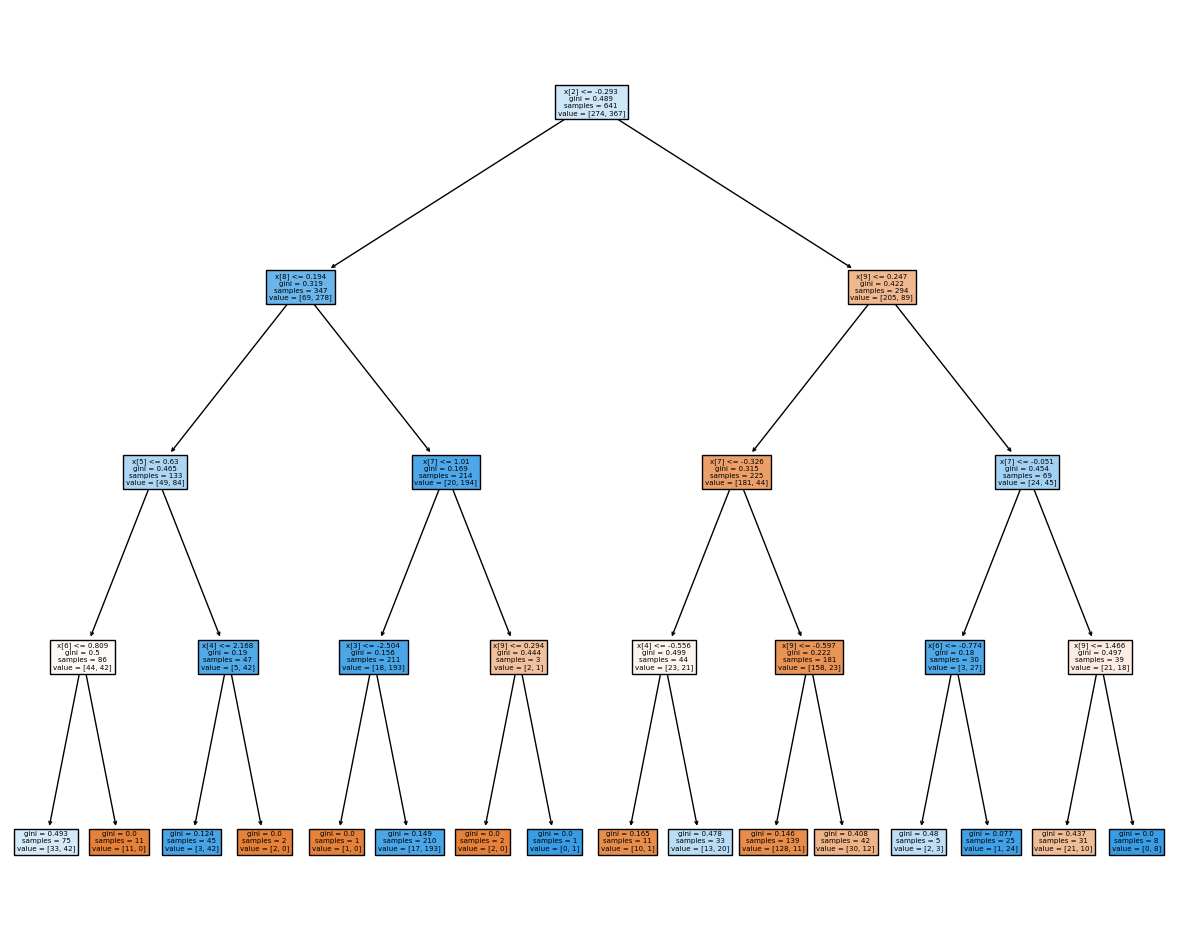

In [74]:
from sklearn import tree
fig = plt.figure(figsize = (15,12))
tree.plot_tree(dt , filled= True)

Fifth,show the sample of Y_pred and Y_test as there are 10 correct out of 10 values.

In [77]:
Y_pred = dt.predict(X_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
416,1,1
325,1,1
267,0,0
241,1,1
875,0,0
352,1,1
171,0,0
218,0,0
896,0,0
514,1,1


Sixth, bulid the f_importances function to give the importance of the vairbales dataset and to prove the result of the decision tree.

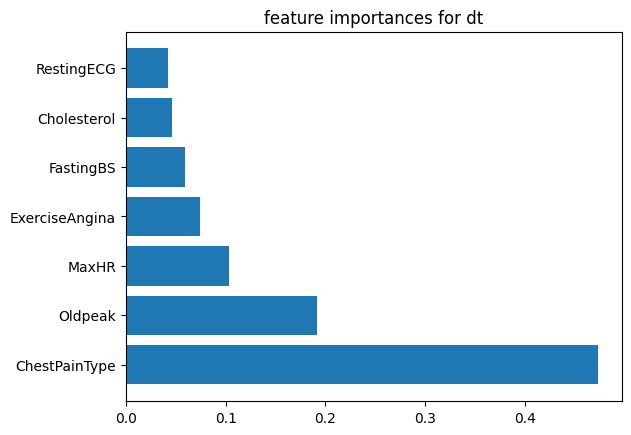

In [78]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
    
#dt= DecisionTreeClassifier (max_depth=7, max_features=6)
#df.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dt.feature_importances_), features_names, top=7)

At the end evaluating the model print the Training set score and Test set score: These two values are comparable.So, there is no sign of overfitting 

In [79]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.8393
Test set score: 0.7645


In [80]:
DT_pipe = Pipeline([('scaler', StandardScaler()), ('DT', DecisionTreeClassifier(random_state=101))])

In [81]:
param_grid= {'DT__max_features': ['auto','sqrt','log2'],
            'DT__criterion': ['gini','entropy']}

DT_grid=GridSearchCV(DT_pipe, param_grid, cv=5)

In [82]:
DT_grid.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=101))]),
             param_grid={'DT__criterion': ['gini', 'entropy'],
                         'DT__max_features': ['auto', 'sqrt', 'log2']})

In [83]:
DT_grid.best_params_

{'DT__criterion': 'gini', 'DT__max_features': 'auto'}

In [84]:
ypred_DT_grid = DT_grid.predict(X_test)

In [85]:
def Eval_Report(model, y_pred):
    
    print('********* EVALUATION REPORT ********* \n')
    print('CONFUSION MATRIX: \n')
    print(confusion_matrix(y_test, y_pred))
    print('\nCLASSIFICATION REPORT: \n')
    print(classification_report(y_test, y_pred))
    #print('\nPLOTS:\n')
    
    #plot_confusion_matrix(model, X_test, y_test)
    #plot_precision_recall_curve(model, X_test, y_test)
   # plot_roc_curve(model, X_test, y_test)

In [87]:
Eval_Report(DT_grid, ypred_DT_grid)

********* EVALUATION REPORT ********* 

CONFUSION MATRIX: 

[[ 88  48]
 [ 39 101]]

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       136
           1       0.68      0.72      0.70       140

    accuracy                           0.68       276
   macro avg       0.69      0.68      0.68       276
weighted avg       0.69      0.68      0.68       276



In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

#
# Get the predictions
#
y_pred = Pipeline.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

AttributeError: 'DataFrame' object has no attribute '_final_estimator'

In [99]:
import matplotlib.pyplot as plt
#import numpy
from sklearn import metrics

actual = confusion_matrix(y_test, y_train)
predicted = confusion_matrix(X_test,X_train)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


TypeError: 'numpy.ndarray' object is not callable

In [82]:
#Classification Report#:it seems it is very good 
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       126
           1       0.79      0.79      0.79       150

    accuracy                           0.77       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.77      0.77      0.77       276



In [ ]:
#Here, the training-set accuracy score is0.8226 while the test-set accuracy to be 0.8207 
#These two values are quite comparable.
#So, there is no sign of overfitting

# Random Forest:

In [ ]:
rf = RandomForestClassifier(max_features=7 ,    max_depth=3)

In [ ]:
rf.fit(X_train , y_train)
rf.score(X_train , y_train)

In [ ]:
rf.score(X_test , y_test)

In [ ]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)
    
rf =RandomForestClassifier(n_estimators=4 , max_depth=3 , min_samples_split=25 , max_features=4)
rf.fit(X_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=8)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Accuracy, Precision, Recall, F1= {}, {}, {}, {}
models = {}
models['Logistic Regression'] = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=6, algorithm='kd_tree', metric='manhattan')
models['Decision Trees'] = DecisionTreeClassifier(criterion='gini', max_depth=4)
models['Random Forest'] = RandomForestClassifier(n_estimators = 85, min_samples_split= 8, min_samples_leaf= 3, max_features= 'auto',
                                      max_depth= 50, bootstrap= True, random_state=125)

In [ ]:
for key in models.keys():

    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    Accuracy[key] = accuracy_score(predictions, y_test)
    Precision[key] = precision_score(predictions, y_test)
    Recall[key] = recall_score(predictions, y_test)
    F1[key] = f1_score(predictions, y_test)

In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = Accuracy.values()
df_model['Precision'] = Precision.values()
df_model['Recall'] = Recall.values()
df_model['F1 Score'] = F1.values()
df_model.sort_values

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
ax = df_model.sort_values(by='Accuracy',ascending=False).plot.bar(rot=0)
ax.title.set_text('Comparaison of Models')
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='upper left',prop={'size': 13})


In [ ]:
#after this comparesion we find that the logistic regression has the highest acc 

# XGBoost Model :

In [ ]:
pip install xgboost

In [ ]:
pip install --upgrade xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth = 7 , learning_rate = 0.25 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [ ]:
xgb.fit(X_train , y_train)

In [ ]:
xgb.score(X_train , y_train)

In [ ]:
xgb.score(X_test , y_test)

In [ ]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = list(df.columns)



# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(xgb.feature_importances_), features_names, top=6)


# Adaboost :

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=3, learning_rate=0.2)

In [ ]:
ada.fit(X_train , y_train)

In [ ]:
ada.score(X_train , y_train )

In [ ]:
ada.score(X_test , y_test)

# Voting :

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors=4)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf4 = RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4)


In [ ]:
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) ,
                                     ("XGBClassifier" , clf3) ,("RandomForestClassifier" , clf4)] , voting = "hard")

In [ ]:
v_clf.fit(X_train , y_train)

In [ ]:
v_clf.score(X_train , y_train)

In [ ]:
v_clf.score(X_test , y_test)

# Light GBM :

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=500, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')

In [ ]:
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

# CatBOOST:

In [ ]:
pip install catboost

In [ ]:
# model building catboost
from catboost import CatBoostClassifier
model2 = CatBoostClassifier(iterations=107)
model2.fit(X_train, y_train)


In [ ]:
# predict
y_pred = model2.predict(X_test)


In [ ]:
# Print accuracy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
# print classification report
from sklearn.metrics import classification_report
print('Classification report\n',classification_report(y_test, y_pred))

# XGBM :

In [ ]:
import xgboost as Xgb

In [ ]:
xgb = Xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
xgb.score(X_train, y_train)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

In [ ]:
print("Training Accuracy     :",xgb_train,"%")
print("Model Accuracy Score  :",xgb_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

# Conclusion:

According to the compared algorithms,  XGBoost Model Algorithm gives the best result in terms of accuracy. 
When examined in general,
the algorithms give results that are close to each other.
Achieved 91% accuracy with  XGBoost Model :